# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:49.055000,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:50.175073,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:51.295146,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:52.415218,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:53.535291,0.00001,0,0,ZERO,ZERO,PHOT,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:55:22.516000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,None,True
2467,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:57:04.915000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,None,True
2468,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:58:47.601000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,16,L4,None,True
2469,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T08:00:30.377000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   72R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   72R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   72R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   72R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   72R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

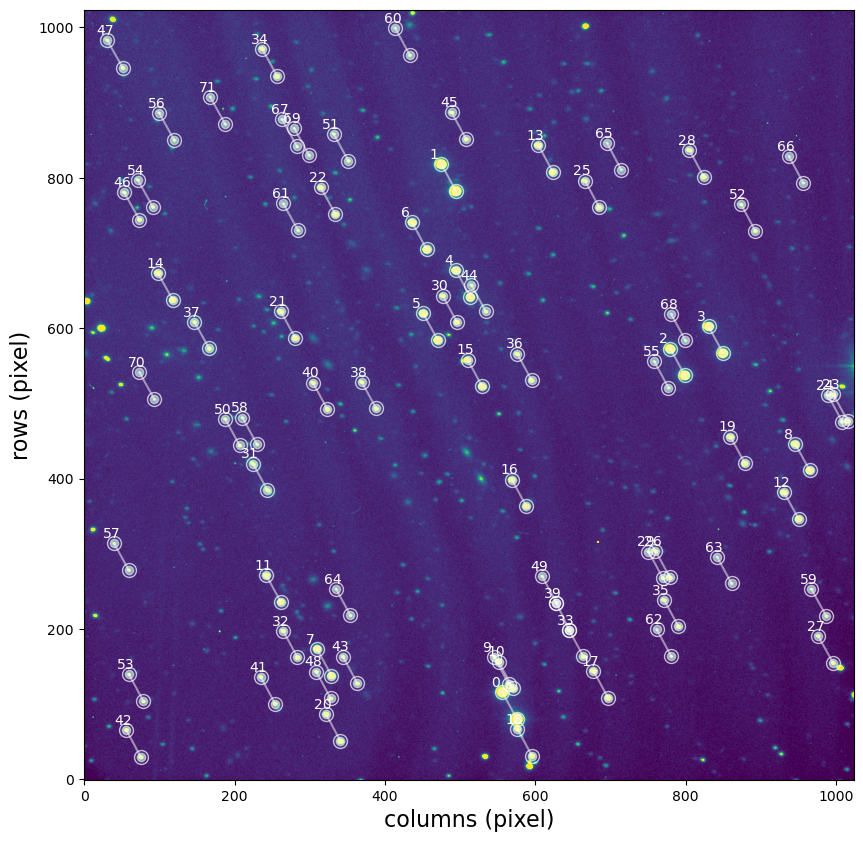

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553041,-38.759735,575.268990,80.451110,4.643467,4.643467,-10.330984,0.001146,-9.422808,0.000538,10,0
1,1,189.564732,-38.693905,494.068155,782.976909,4.904796,4.904796,-9.857426,0.001558,-9.439666,0.000541,10,0
2,2,189.527389,-38.716373,798.520551,537.733011,4.963518,4.963518,-9.504705,0.001987,-9.431149,0.000569,10,0
3,3,189.521345,-38.713494,849.375627,567.249908,4.984046,4.984046,-9.308051,0.002287,-9.434266,0.000565,10,0
4,4,189.561995,-38.707172,513.476879,641.735205,4.793668,4.793668,-8.556723,0.004041,-9.439589,0.000535,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,189.590373,-38.688757,282.936502,841.748242,4.540516,4.540516,-5.536596,0.056787,-9.442652,0.000568,10,0
68,68,189.527374,-38.712050,799.615253,583.677273,4.845240,4.845240,-5.114043,0.083217,-9.435096,0.000569,10,0
69,69,189.588392,-38.689843,298.986034,829.926687,4.588732,4.588732,-5.235561,0.074423,-9.443450,0.000548,10,0
70,70,189.612297,-38.720781,93.395089,505.482642,4.293704,4.293704,-5.106059,0.083653,-9.440001,0.000550,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

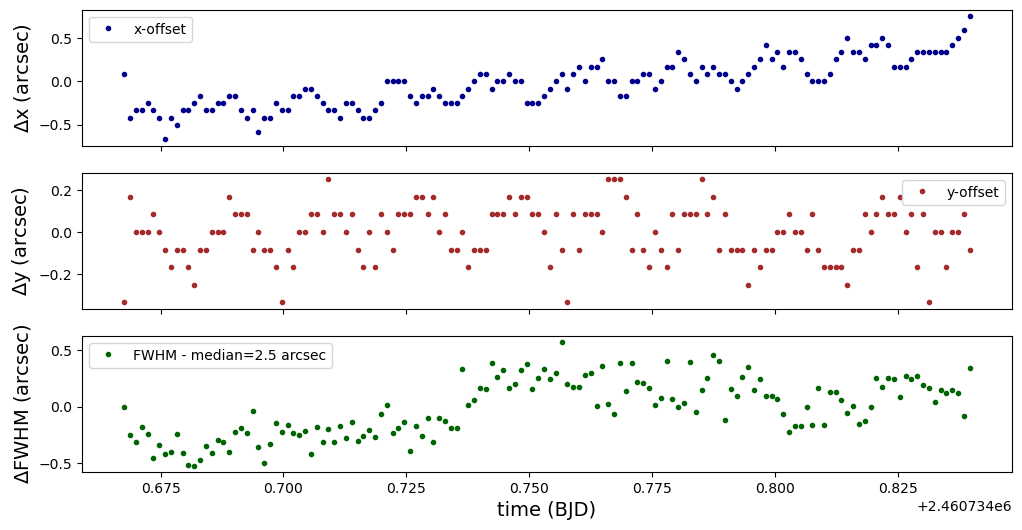

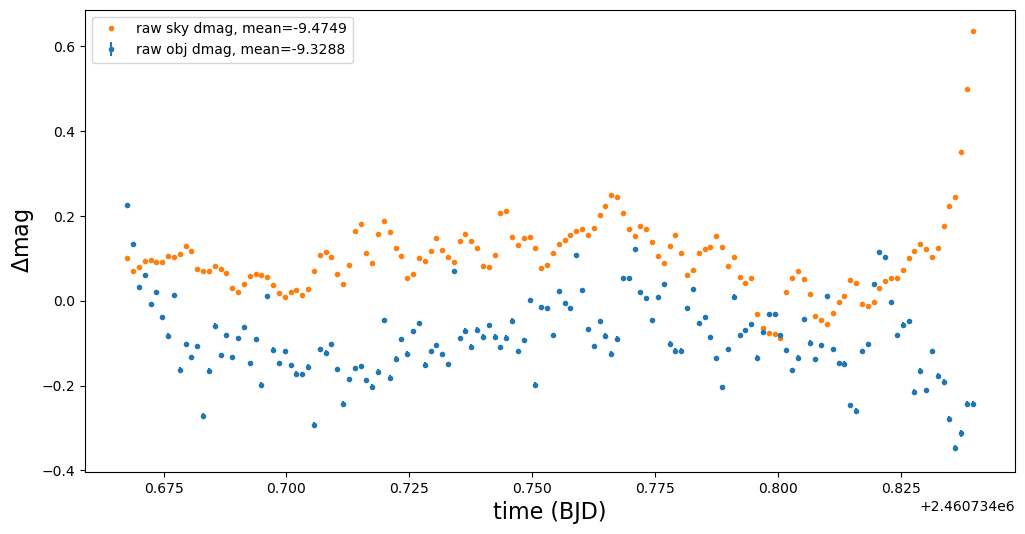

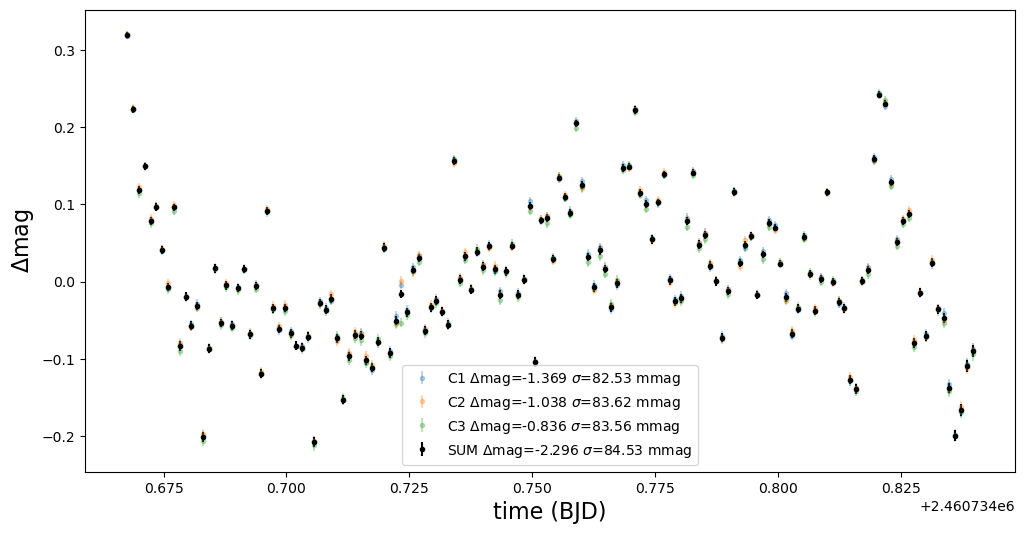

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460734.667597448 460.5504380057575 ...   0.31893404859144425
2460734.6687853816 459.0504380057575 ...   0.22314840705788974
2460734.6699719145 459.3004380057575 ...   0.11856434749317657
 2460734.671158285 459.3004380057575 ...    0.1493543495893377
2460734.6723476998 459.5504380057575 ...   0.07884775748515516
2460734.6735335034 459.3004380057575 ...    0.0966198014481332
2460734.6747211013 459.0504380057575 ...  0.040638601616651115
               ...               ... ...                   ...
 2460734.832557048 461.3004380057575 ... -0.035802579693458014
2460734.8337423415 461.3004380057575 ...  -0.04691589468708557
2460734.8349299836 461.3004380057575 ...   -0.1374617088036878
2460734.8361152303 461.5504380057575 ...    -0.199495808255163
2460734.8373037986 461.8004380057575 ...  -0.16619289648996194
2460734.8384934086 462.0504380057575 ...  -0.1090137660

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=5
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     903   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1250   72R x 619C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0143', 'EFE0143', 'FO0144', 'EFO0144', 'FE0144', 'EFE0144', 'FO0145',
       'EFO0145', 'FE0145', 'EFE0145'],
      dtype='object', length=619)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:47:50,640 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:47:50,640 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:47:50,652 root - INFO - Source index: i=5   [pipeline_lib]


2025-09-18 00:47:50,652 | INFO | Source index: i=5 


2025-09-18 00:47:50,652 root - INFO - Source RA=189.56706622165555 Dec=-38.712642162483256 mag=-14.7867+-0.0006  [pipeline_lib]


2025-09-18 00:47:50,652 | INFO | Source RA=189.56706622165555 Dec=-38.712642162483256 mag=-14.7867+-0.0006


2025-09-18 00:47:50,654 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:47:50,654 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:47:50,654 root - INFO - Polarization in Q: -0.003+-0.001  [pipeline_lib]


2025-09-18 00:47:50,654 | INFO | Polarization in Q: -0.003+-0.001


2025-09-18 00:47:50,655 root - INFO - Polarization in U: -0.003+-0.002  [pipeline_lib]


2025-09-18 00:47:50,655 | INFO | Polarization in U: -0.003+-0.002


2025-09-18 00:47:50,656 root - INFO - Polarization in V: -0.0004+-0.0009  [pipeline_lib]


2025-09-18 00:47:50,656 | INFO | Polarization in V: -0.0004+-0.0009


2025-09-18 00:47:50,657 root - INFO - Total linear polarization p: 0.004+-0.002  [pipeline_lib]


2025-09-18 00:47:50,657 | INFO | Total linear polarization p: 0.004+-0.002


2025-09-18 00:47:50,658 root - INFO - Angle of polarization theta: 120+-10 deg  [pipeline_lib]


2025-09-18 00:47:50,658 | INFO | Angle of polarization theta: 120+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:47:50,659 root - INFO - Free constant k: 0.812358802792908+-0.0  [pipeline_lib]


2025-09-18 00:47:50,659 | INFO | Free constant k: 0.812358802792908+-0.0


2025-09-18 00:47:50,660 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-09-18 00:47:50,660 | INFO | Zero of polarization: 30.2+-0.0


2025-09-18 00:47:50,661 root - INFO - RMS of zi residuals: 0.007539994739998966  [pipeline_lib]


2025-09-18 00:47:50,661 | INFO | RMS of zi residuals: 0.007539994739998966


2025-09-18 00:47:50,661 root - INFO - Reduced chi-square (n=146.0, DOF=143.0): 1.05  [pipeline_lib]


2025-09-18 00:47:50,661 | INFO | Reduced chi-square (n=146.0, DOF=143.0): 1.05


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:47:50,752 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:47:50,752 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:47:50,757 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:47:50,757 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:47:50,980 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:47:50,980 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:47:50,985 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:47:50,985 | INFO | Substituting symbol \perp from STIXGeneral


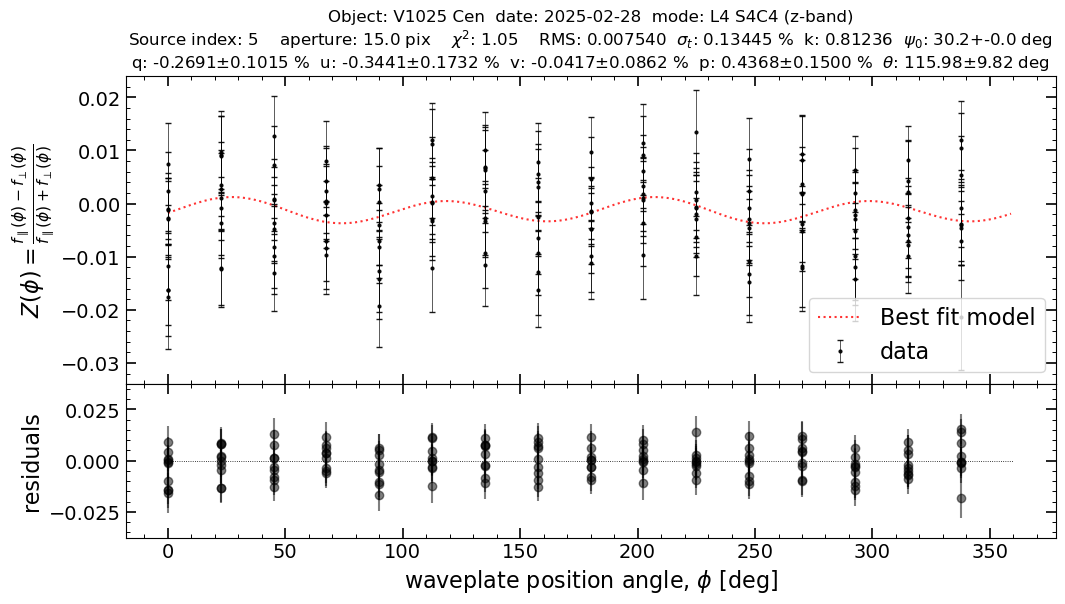

In [11]:
source_index = 5

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs4/20250227_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 5
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 146
MAG : -14.7867+-0.0006
RA : 189.56706622165555
DEC : -38.712642162483256
FWHM : 5.282569460033337
X1 : 450.9889859321098
Y1 : 619.6824691360682
X2 : 470.11189007940516
Y2 : 584.4453103516067
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.4+-0.2 %  Angle of polarization: 120+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

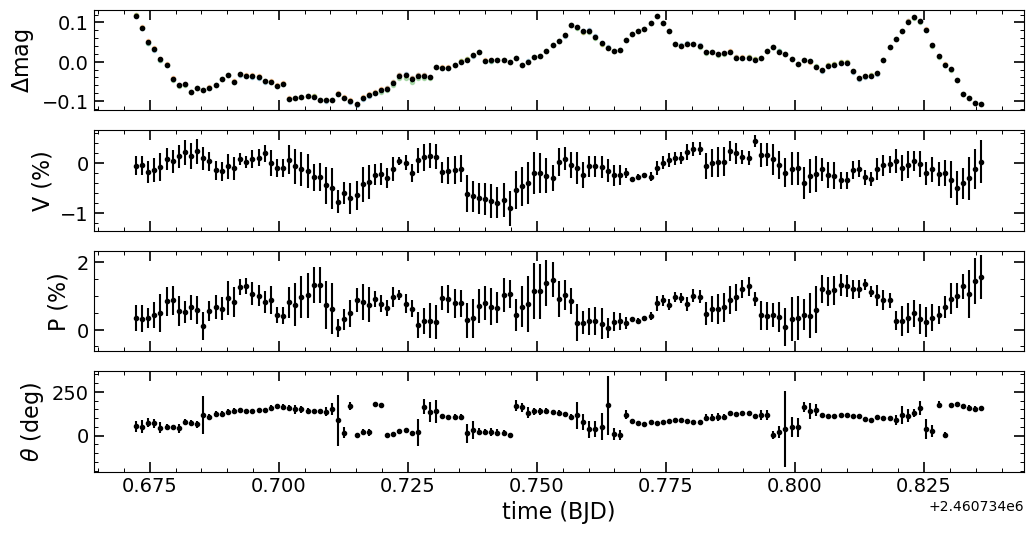

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.11573833162386471,0.001799182811026261,0.11907351484922124,0.0018706068020227055,0.11751901281378885,0.001937950374533023,2460734.6723297862,450.9889859321098,619.6824691360682,470.11189007940516,584.4453103516067,4.702087651812866,-11.733421174585386,0.0016992143301475845,-13.89819421200924,0.001352735092352506,0.11700730216741029,0.0034834368715302455,0.0038070489870782173,53.59178382677311,31.256946816035228
0.08581068871932374,0.0018415732578327929,0.08925296683841566,0.0019109323973464174,0.0867786222739042,0.0019757540508393554,2460734.6735172626,449.4889859321098,621.1824691360682,468.61189007940516,585.9453103516067,4.605398491956527,-11.704748745984707,0.0017441367923484317,-13.89962792050117,0.0013493032681093989,0.08690116507480283,0.00317360253397946,0.00400994205032643,51.13393508047994,36.136958365586615
0.0481066466605391,0.0019025333798429662,0.05160540417483972,0.0019699920094200084,0.04807962387817355,0.0020327140405400667,2460734.6747049293,449.7389859321098,620.6824691360682,468.86189007940516,585.4453103516067,4.605398491956527,-11.667949331571805,0.0018083362655073611,-13.900774600877288,0.0013498844401491482,0.04895507028578194,0.003385975805135507,0.0030092695578391036,74.32520771608947,25.418111146471713
0.03100203324755313,0.001933154237438474,0.033981273423895786,0.0019994445567936632,0.03147254815363176,0.00206190798865146,2460734.675891283,449.7389859321098,620.6824691360682,468.86189007940516,585.4453103516067,4.49345534523691,-11.651389194892996,0.0018398950893774883,-13.901351856879904,0.0013530286675960197,0.03181767760435683,0.004417174892027429,0.0039003550247346964,69.24745096432677,25.253732630951404
0.005094453415413369,0.0019717485744551277,0.007689739126321982,0.0020364953512800616,0.0053776188263583435,0.0020977369473006943,2460734.677080269,449.9889859321098,620.6824691360682,469.11189007940516,585.4453103516067,4.4485078457407985,-11.62684396941119,0.0018803343912499602,-13.902883379370472,0.001352269865067433,0.005740929631983249,0.004970882246438775,0.0055455778645167155,44.54921814947845,31.906514590806157
-0.008546240315876474,0.001989584910907735,-0.0066014398961637966,0.0020533940841270582,-0.008378437209909606,0.0021133444338116763,2460734.6782676587,449.7389859321098,620.9324691360682,468.86189007940516,585.6953103516067,4.394694989377825,-11.614368991472634,0.0018993446836043696,-13.904283016914782,0.0013485434353234557,-0.0081336858508827,0.008367779945418746,0.0043871665992047245,50.06582120621226,14.994773471062658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.007315038344506419,0.002107142047682645,-0.005463498870982519,0.0021766605974545784,-0.008340667549701308,0.002241362176587336,2460734.828982927,451.2389859321098,620.9324691360682,470.36189007940516,585.6953103516067,5.740252321760024,-11.554226970474193,0.0020121207466934944,-13.843250615702893,0.0014337760196197651,-0.007243305637434361,0.0067368345670117185,0.0032247245179692716,4.360782385665822,13.689978623718925
-0.019263969932778124,0.0021486326090446382,-0.018177904006368095,0.0022176388497102506,-0.020829293925709536,0.0022823237955991796,2460734.8301679306,451.2389859321098,621.1824691360682,470.36189007940516,585.9453103516067,5.696774791483394,-11.540340882872712,0.0020542245202805048,-13.841694310375356,0.0014436173056552796,-0.019573087911378906,0.009158322730230067,0.004611266582811223,173.19354520515807,14.400259540219103


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=5, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)